# A) Universal Approximation Theorem

In [1]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset,DataLoader
import torch.optim as optim

In [3]:
x= np.linspace(-2*np.pi, 2*np.pi, 100).reshape(-1, 1)
y = np.sin(x)

# Sine Function

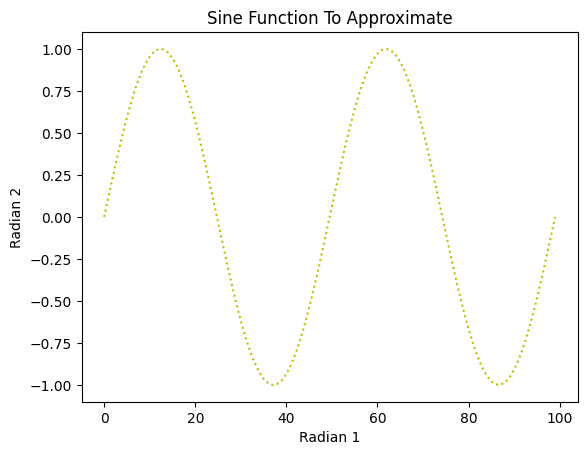

In [4]:
plt.plot(y,linestyle="dotted", c="y")
plt.xlabel("Radian 1")
plt.ylabel("Radian 2")
plt.title("Sine Function To Approximate")
plt.show()

# Mutli-Layer Perceptron

In [15]:
class NNModel(nn.Module):
    def __init__(self,n_inputs:int=1, hidden_size:int=4):
        super(NNModel, self).__init__()
        self.input_layer = nn.Linear(n_inputs,hidden_size)
        self.hidden_layer = nn.Sequential(nn.Linear(hidden_size, hidden_size), nn.ReLU())
        self.fc = nn.Linear(hidden_size, 1)
    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_layer(x)
        x = self.fc(x)
        return x

In [18]:
model = NNModel()

In [19]:
class SineWaveDataset(Dataset):
    def __init__(self, num_samples=10000):
        self.x = np.linspace(-2*np.pi, 2 * np.pi, num_samples, dtype=np.float32)
        self.y = np.sin(self.x)
        self.x = self.x.reshape(-1, 1)  # Reshape for single input feature
        self.y = self.y.reshape(-1, 1)  # Reshape for single output

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return torch.tensor(self.x[idx]), torch.tensor(self.y[idx])

In [20]:
def train(model, dataloader, criterion, optimizer, epochs=500):
    model.train()
    for epoch in range(epochs):
        total_loss = 0.0
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            y_pred = model(x_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Loss = {total_loss / len(dataloader):.6f}")


In [21]:
def plot_predictions(model, dataset):
    model.eval()
    x_test = torch.tensor(dataset.x, dtype=torch.float32).to(device)
    with torch.no_grad():
        y_pred = model(x_test).cpu().numpy()

    plt.plot(dataset.y, label="True Sine", color="y")
    plt.legend()
    plt.show()
    plt.plot(y_pred, label="Model Prediction", color="r", linestyle="dotted")
    plt.show()


In [22]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize Dataset, Model, and Training Parameters
dataset = SineWaveDataset()
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)
model = NNModel().to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train the Model
train(model, dataloader, criterion, optimizer, epochs=200)

Epoch 0: Loss = 0.208207
Epoch 100: Loss = 0.075725


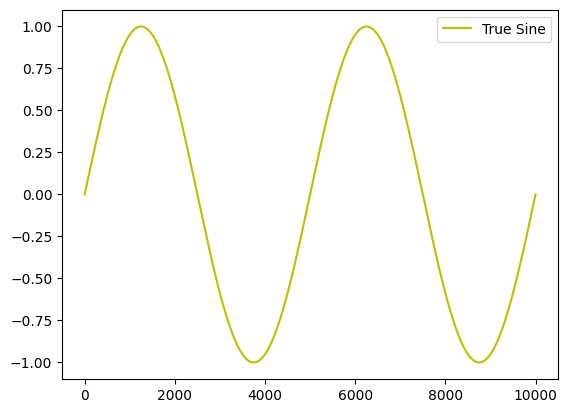

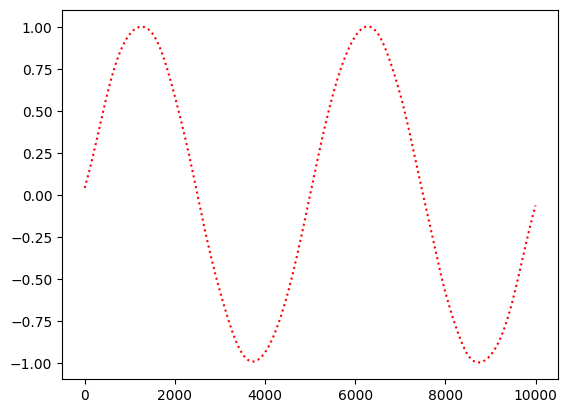

In [14]:
plot_predictions(model, dataset)

# B) Associative Hopfield Networks